# Experiment Result Analysis


In [18]:
import json
from defines import EVAL_PATH, IMAGE_PATH, DATASET_PATH

from PIL import Image

In [19]:
def eval_result(eval_dir, method_name, t = 5, grid_size = 5, top = None):
    print("{}: ".format(method_name))
    success = []
    failed = []
    total_exp = 0
    with open(f'{eval_dir}/{method_name}_exp.json') as f:
        results = json.load(f)
        results = results[:top] if top != None else results
        total_exp = len(results)
        for res in results:
            true_label = res["true_label_idx"]
            perturbed_label = res["perturbed_topk_indices"][0]
            if true_label == perturbed_label:
                failed.append(res)
            else:
                success.append(res)

    num_success = len(success)
    success_rate = num_success / total_exp
    print("Success: {}, Failed: {}, Total: {}".format(num_success, len(failed), num_success+len(failed)))

    total_conf = 0.0
    total_pixels = 0
    for exp in success:
        num_pixel = (exp["num_iteration"]+1) * t * (grid_size ** 2)
        perturbed_prob = exp["perturbed_topk_probabilities"][0]
        total_conf += perturbed_prob
        total_pixels += num_pixel

    avg_pixels = total_pixels/num_success
    
    print("Success Rate: {:.5f}\nConf: {:.5f}\nAvg Percentage Pixels Perturbed: {:.5f}\n".format(success_rate, total_conf/num_success, avg_pixels/(256*256)))
    
    return success, failed

In [20]:
success, failed = eval_result(method_name = "LocSearchAdv", eval_dir = f"{EVAL_PATH}/LocSearchAdv")

LocSearchAdv: 
Success: 795, Failed: 205, Total: 1000
Success Rate: 0.79500
Conf: 0.30090
Avg Percentage Pixels Perturbed: 0.07883



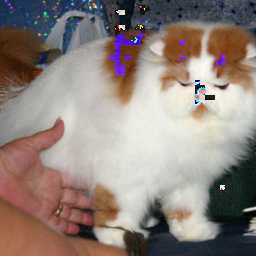

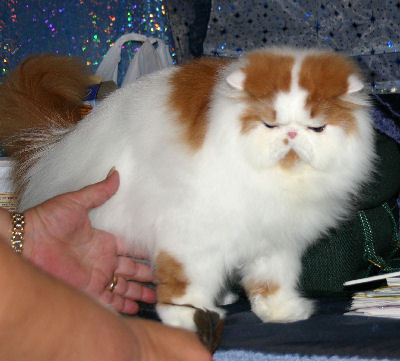

{'input_name': 'ILSVRC2012_val_00023827_n02123394.JPEG',
 'true_label_idx': 283,
 'num_iteration': 9,
 'original_true_class_probability': 0.7962711453437805,
 'perturbed_true_class_probability': 0.19037525355815887,
 'perturbed_topk_indices': [259, 283, 332],
 'perturbed_topk_labels': ['Pomeranian',
  'Persian cat',
  'Angora, Angora rabbit'],
 'perturbed_topk_probabilities': [0.3319430947303772,
  0.19037525355815887,
  0.06513189524412155]}

In [32]:
item = success[90]

org_name = item["input_name"]
perturbed_name = "perturbed_" + item["input_name"]+".png"
img_dir = f"{IMAGE_PATH}/LocSearchAdv"
image_folder = f"{DATASET_PATH}/images"

perturbed_image = Image.open(f"{img_dir}/{perturbed_name}")
org_img = Image.open(f"{image_folder}/{org_name}")

display(perturbed_image)
display(org_img)

item